<a href="https://colab.research.google.com/github/Cedrik-Black/Data_science/blob/master/exercises/Pandas/121_130_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.25.2'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [71]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [72]:
google = fetch_financial_data('GOOGL')
google

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-05,131.88,133.24,130.66,132.67,40194757
2024-03-04,135.66,135.66,131.91,133.35,55999415
2024-03-01,138.43,138.87,136.92,137.14,31151116
2024-02-29,137.28,138.86,136.40,138.46,42132953
2024-02-28,137.90,138.01,135.41,136.38,37328558
...,...,...,...,...,...
2019-03-14,59.95,60.23,59.56,59.63,27301440
2019-03-13,60.30,60.36,59.90,59.95,25887080
2019-03-12,59.12,60.29,59.12,59.86,42219580


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [73]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-03-05 to 2019-03-08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [74]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,101.22,102.37,100.14,101.29,33582045.40
std,29.64,29.91,29.34,29.62,14952772.70
min,52.22,52.50,50.44,51.94,9312760.00
25%,72.60,73.23,71.58,72.55,24212147.00
50%,102.80,104.31,101.72,102.94,29865120.00
75%,129.39,130.98,127.86,129.20,37590695.00
max,152.80,153.78,151.43,153.51,133177100.00


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [75]:
pd.set_option('display.precision', 2)
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,101.22,102.37,100.14,101.29,33582045.40
std,29.64,29.91,29.34,29.62,14952772.70
min,52.22,52.50,50.44,51.94,9312760.00
25%,72.60,73.23,71.58,72.55,24212147.00
50%,102.80,104.31,101.72,102.94,29865120.00
75%,129.39,130.98,127.86,129.20,37590695.00
max,152.80,153.78,151.43,153.51,133177100.00


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [76]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,101.22,102.37,100.14,101.29,33582045.40
std,29.64,29.91,29.34,29.62,14952772.70
min,52.22,52.50,50.44,51.94,9312760.00
25%,72.60,73.23,71.58,72.55,24212147.00
50%,102.80,104.31,101.72,102.94,29865120.00
75%,129.39,130.98,127.86,129.20,37590695.00
max,152.80,153.78,151.43,153.51,133177100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

<Axes: xlabel='Date'>

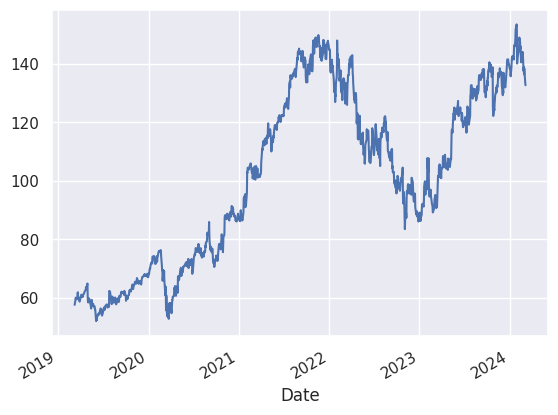

In [77]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [78]:
google = google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2024-03-05,131.88,133.24,130.66,132.67,40194757
1,2024-03-04,135.66,135.66,131.91,133.35,55999415
2,2024-03-01,138.43,138.87,136.92,137.14,31151116
3,2024-02-29,137.28,138.86,136.40,138.46,42132953
4,2024-02-28,137.90,138.01,135.41,136.38,37328558
...,...,...,...,...,...,...
1252,2019-03-14,59.95,60.23,59.56,59.63,27301440
1253,2019-03-13,60.30,60.36,59.90,59.95,25887080
1254,2019-03-12,59.12,60.29,59.12,59.86,42219580
1255,2019-03-11,57.60,59.00,57.58,58.96,30032660


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [79]:
google['Month'] = google['Date'].dt.month
google['Year'] = google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2024-03-05,131.88,133.24,130.66,132.67,40194757,3,2024
1,2024-03-04,135.66,135.66,131.91,133.35,55999415,3,2024
2,2024-03-01,138.43,138.87,136.92,137.14,31151116,3,2024
3,2024-02-29,137.28,138.86,136.40,138.46,42132953,2,2024
4,2024-02-28,137.90,138.01,135.41,136.38,37328558,2,2024
...,...,...,...,...,...,...,...,...
1252,2019-03-14,59.95,60.23,59.56,59.63,27301440,3,2019
1253,2019-03-13,60.30,60.36,59.90,59.95,25887080,3,2019
1254,2019-03-12,59.12,60.29,59.12,59.86,42219580,3,2019
1255,2019-03-11,57.60,59.00,57.58,58.96,30032660,3,2019


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [80]:
close_mean_year = google['Close'].groupby(by=google['Year']).mean()
close_mean_year

Year
2019    60.48
2020    73.95
2021   124.22
2022   114.76
2023   118.79
2024   142.74
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

<Axes: xlabel='Year'>

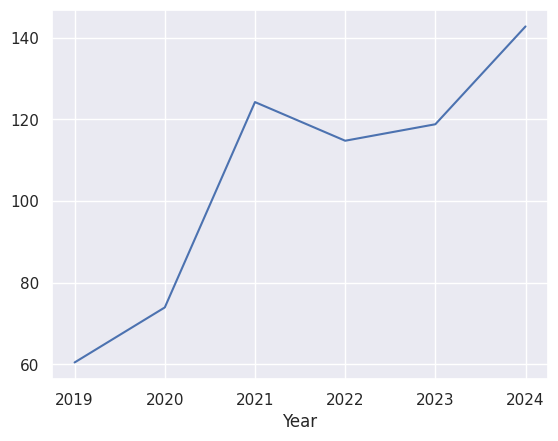

In [81]:
close_mean_year.plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [82]:
close_mean_month = google['Close'].groupby(by=google['Month']).mean()
close_mean_month

Month
1    107.12
2    110.74
3     94.32
4     93.54
5     94.22
6     96.74
7     98.56
8    104.90
9    103.20
10   101.69
11   105.84
12   105.62
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

<Axes: xlabel='Month'>

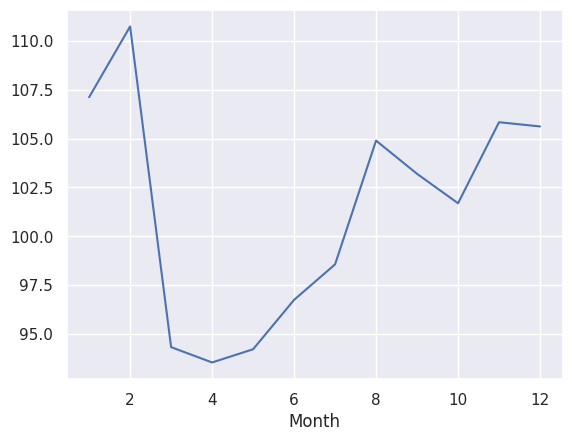

In [83]:
close_mean_month.plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [84]:
google.groupby(['Year', 'Month'])['Close'].mean()

Year  Month
2019  3        59.64
      4        61.57
      5        57.77
      6        54.15
      7        57.65
               ...  
2023  11      133.38
      12      135.57
2024  1       143.84
      2       142.83
      3       134.39
Name: Close, Length: 61, dtype: float64

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [85]:
google['Close'].argmax()

25

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [86]:
google['Date'].iloc[25]
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Month,Year
25,2024-01-29,152.06,153.78,151.43,153.51,27784259,1,2024


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [87]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2024-03-05,131.88,132.67,40194757
1,2024-03-04,135.66,133.35,55999415
2,2024-03-01,138.43,137.14,31151116
3,2024-02-29,137.28,138.46,42132953
4,2024-02-28,137.90,136.38,37328558
...,...,...,...,...
1252,2019-03-14,59.95,59.63,27301440
1253,2019-03-13,60.30,59.95,25887080
1254,2019-03-12,59.12,59.86,42219580
1255,2019-03-11,57.60,58.96,30032660


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [88]:
google = google.set_index('Date')
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2024-03-05,131.88,133.24,130.66,132.67,40194757,3,2024
2024-03-04,135.66,135.66,131.91,133.35,55999415,3,2024
2024-03-01,138.43,138.87,136.92,137.14,31151116,3,2024
2024-02-29,137.28,138.86,136.40,138.46,42132953,2,2024
2024-02-28,137.90,138.01,135.41,136.38,37328558,2,2024
...,...,...,...,...,...,...,...
2019-03-14,59.95,60.23,59.56,59.63,27301440,3,2019
2019-03-13,60.30,60.36,59.90,59.95,25887080,3,2019
2019-03-12,59.12,60.29,59.12,59.86,42219580,3,2019


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [89]:
del google['Year']
del google['Month']
google

,Open,High,Low,Close,Volume
Date,,,,,
2024-03-05,131.88,133.24,130.66,132.67,40194757
2024-03-04,135.66,135.66,131.91,133.35,55999415
2024-03-01,138.43,138.87,136.92,137.14,31151116
2024-02-29,137.28,138.86,136.40,138.46,42132953
2024-02-28,137.90,138.01,135.41,136.38,37328558
...,...,...,...,...,...
2019-03-14,59.95,60.23,59.56,59.63,27301440
2019-03-13,60.30,60.36,59.90,59.95,25887080
2019-03-12,59.12,60.29,59.12,59.86,42219580


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [92]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2024-03-05,131.88,133.24,130.66,132.67,40194757
2024-03-04,135.66,135.66,131.91,133.35,55999415
2024-03-01,138.43,138.87,136.92,137.14,31151116
2024-02-29,137.28,138.86,136.40,138.46,42132953
2024-02-28,137.90,138.01,135.41,136.38,37328558
...,...,...,...,...,...
2019-03-14,59.95,60.23,59.56,59.63,27301440
2019-03-13,60.30,60.36,59.90,59.95,25887080
2019-03-12,59.12,60.29,59.12,59.86,42219580
